In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a DataFrame
file_path = '../data/raw/dataset_pelatihan_sintesis.csv'
df = pd.read_csv(file_path)

### Data Preparation & Cleaning

In [3]:
# Eksplorasi data dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   participant_id                   1000 non-null   object
 1   nama_peserta                     1000 non-null   object
 2   jenis_pelatihan                  1000 non-null   object
 3   durasi_pelatihan                 1000 non-null   int64 
 4   kehadiran (%)                    1000 non-null   int64 
 5   nilai_ujian                      1000 non-null   int64 
 6   status_kelulusan                 1000 non-null   object
 7   produktivitas_setelah_pelatihan  1000 non-null   int64 
 8   tanggal_mulai                    1000 non-null   object
 9   tanggal_selesai                  1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [4]:
# periksa baris dan kolom
df.shape

(1000, 10)

In [5]:
# Ubah kolom tanggal dari objek (teks) menjadi datetime
df['tanggal_mulai'] = pd.to_datetime(df['tanggal_mulai'])
df['tanggal_selesai'] = pd.to_datetime(df['tanggal_selesai'])

In [6]:
# Cek jumlah duplikat
df.duplicated().sum()

np.int64(0)

In [7]:
# Data Understanding (Eksplorasi)
print(df['jenis_pelatihan'].value_counts())
print(df['status_kelulusan'].value_counts())

jenis_pelatihan
Desain Grafis          133
Pariwisata             132
Konstruksi             130
Tataboga               126
Manufaktur             125
Kesehatan              120
Pertanian              118
Teknologi Informasi    116
Name: count, dtype: int64
status_kelulusan
Tidak Lulus    630
Lulus          370
Name: count, dtype: int64


In [8]:
# Feature Engineering

# Hitung durasi pelatihan dalam hari
df['lama_pelatihan_hari'] = (df['tanggal_selesai'] - df['tanggal_mulai']).dt.days + 1

# Buat kolom 'bulan' dan 'tahun' untuk analisis tren
df['tahun'] = df['tanggal_mulai'].dt.year
df['bulan'] = df['tanggal_mulai'].dt.month_name()

df.head()

,participant_id,nama_peserta,jenis_pelatihan,durasi_pelatihan,kehadiran (%),nilai_ujian,status_kelulusan,produktivitas_setelah_pelatihan,tanggal_mulai,tanggal_selesai,lama_pelatihan_hari,tahun,bulan
0,PART-00001,"Marsito Winarsih, M.Kom.",Pertanian,240,96,92,Lulus,84,2024-09-06,2024-10-06,31,2024,September
1,PART-00002,Fitriani Lazuardi,Tataboga,80,93,74,Lulus,82,2024-05-25,2024-06-04,11,2024,May
2,PART-00003,"drg. Elisa Rajata, M.Pd",Desain Grafis,200,70,83,Tidak Lulus,65,2024-09-26,2024-10-21,26,2024,September
3,PART-00004,Aisyah Wibowo,Teknologi Informasi,160,100,51,Tidak Lulus,70,2024-02-27,2024-03-18,21,2024,February
4,PART-00005,Drs. Cinta Situmorang,Konstruksi,40,78,81,Tidak Lulus,60,2025-06-05,2025-06-10,6,2025,June


### Exploratory Data Analysis (EDA)

##### Pertanyaan 1: Jenis pelatihan apa yang paling efektif meningkatkan produktivitas?

Rata-rata Produktivitas per Jenis Pelatihan
jenis_pelatihan
Desain Grafis          72.165414
Konstruksi             72.107692
Kesehatan              71.700000
Pertanian              71.610169
Manufaktur             71.104000
Tataboga               71.007937
Pariwisata             70.818182
Teknologi Informasi    70.094828
Name: produktivitas_setelah_pelatihan, dtype: float64


C:\Users\andik\AppData\Local\Temp\ipykernel_11364\2372769932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produktivitas_per_jenis.index, y=produktivitas_per_jenis.values, palette='viridis')


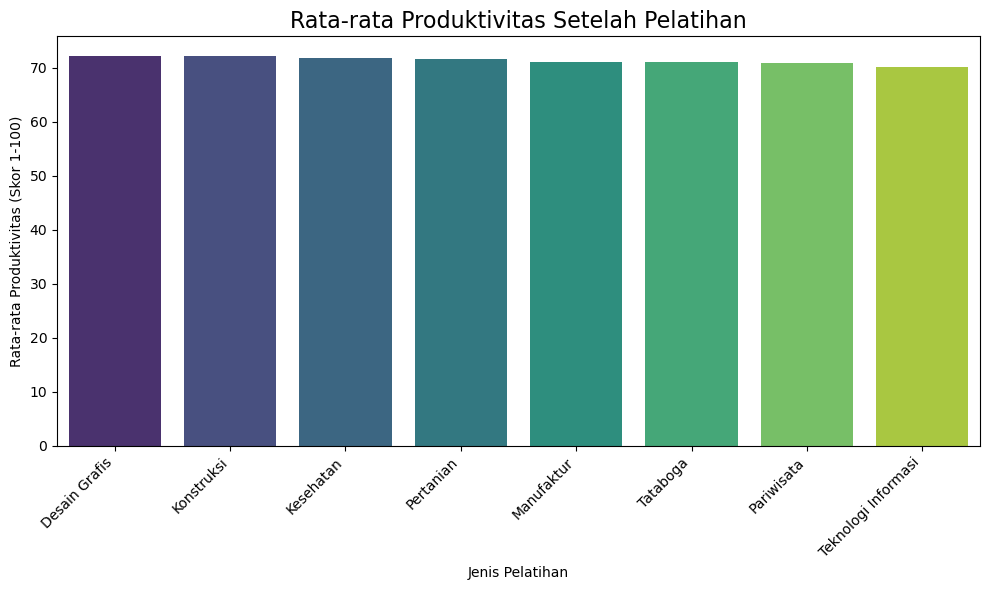

In [9]:
# Hitung produktivitas rata-rata untuk setiap jenis pelatihan
produktivitas_per_jenis = df.groupby('jenis_pelatihan')['produktivitas_setelah_pelatihan'].mean().sort_values(ascending=False)
print("Rata-rata Produktivitas per Jenis Pelatihan")
print(produktivitas_per_jenis)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=produktivitas_per_jenis.index, y=produktivitas_per_jenis.values, palette='viridis')
plt.title('Rata-rata Produktivitas Setelah Pelatihan', fontsize=16)
plt.xlabel('Jenis Pelatihan')
plt.ylabel('Rata-rata Produktivitas (Skor 1-100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Pertanyaan 2: Bagaimana tren kehadiran dan kelulusan peserta?

C:\Users\andik\AppData\Local\Temp\ipykernel_11364\231674534.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tingkat_kelulusan_per_bulan = df_tren.resample('M')['status_kelulusan'].apply(lambda x: (x == 'Lulus').mean() * 100)
C:\Users\andik\AppData\Local\Temp\ipykernel_11364\231674534.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kehadiran_per_bulan = df_tren.resample('M')['kehadiran (%)'].mean()


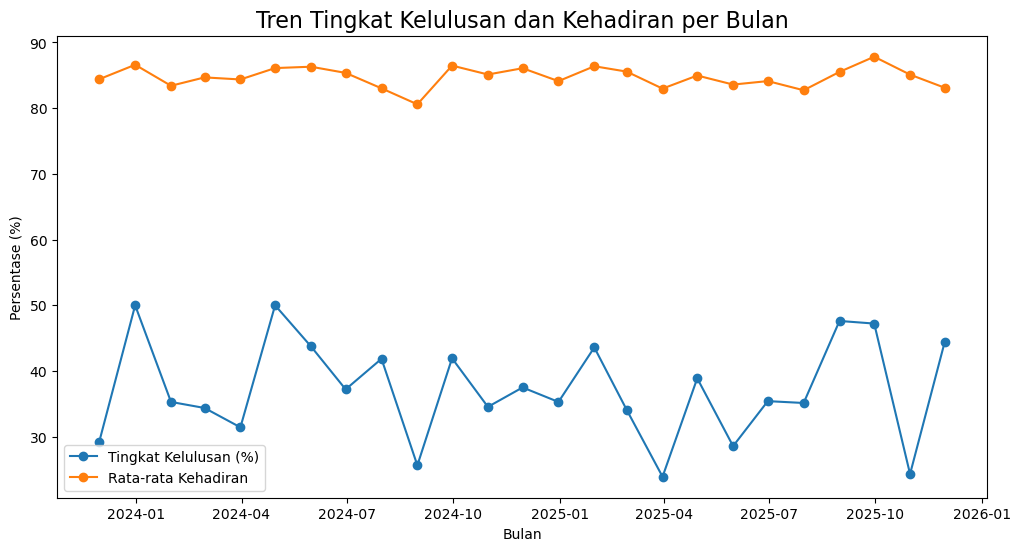

In [10]:
# Tren Tingkat Kelulusan per Bulan

# Hitung persentase kelulusan (lulus/tidak lulus) per bulan
df_tren = df.set_index('tanggal_mulai')
tingkat_kelulusan_per_bulan = df_tren.resample('M')['status_kelulusan'].apply(lambda x: (x == 'Lulus').mean() * 100)

# Tren Kehadiran
kehadiran_per_bulan = df_tren.resample('M')['kehadiran (%)'].mean()

# Visualisasi Tren
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tingkat_kelulusan_per_bulan.index, tingkat_kelulusan_per_bulan.values, label='Tingkat Kelulusan (%)', marker='o')
ax.plot(kehadiran_per_bulan.index, kehadiran_per_bulan.values, label='Rata-rata Kehadiran', marker='o')

ax.set_title('Tren Tingkat Kelulusan dan Kehadiran per Bulan', fontsize=16)
ax.set_ylabel('Persentase (%)')
ax.set_xlabel('Bulan')
ax.legend()
plt.show()

##### Pertanyaan 3: Apakah ada hubungan antara durasi pelatihan dan hasil (produktivitas)?

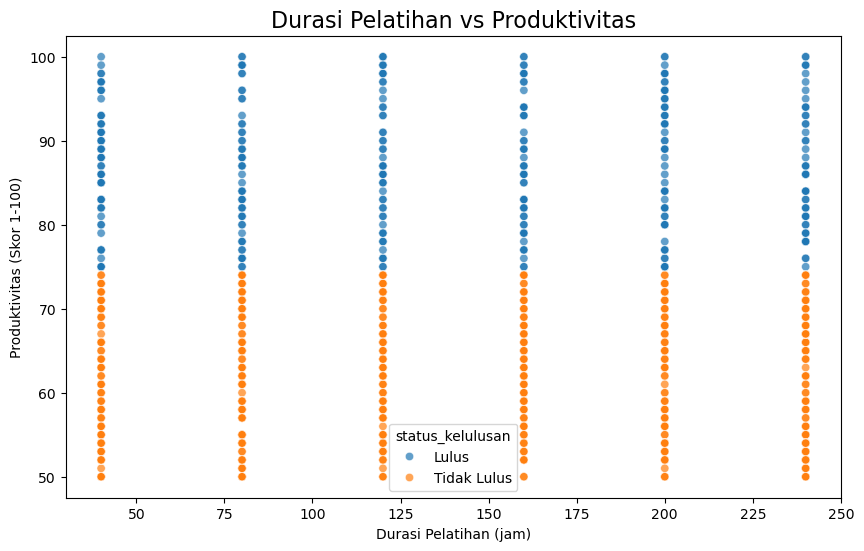

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='durasi_pelatihan', y='produktivitas_setelah_pelatihan', hue='status_kelulusan', alpha=0.7)
plt.title('Durasi Pelatihan vs Produktivitas', fontsize=16)
plt.xlabel('Durasi Pelatihan (jam)')
plt.ylabel('Produktivitas (Skor 1-100)')
plt.show()

Matriks Korelasi
                                 durasi_pelatihan  kehadiran (%)  nilai_ujian  \
durasi_pelatihan                         1.000000      -0.003410    -0.030723   
kehadiran (%)                           -0.003410       1.000000    -0.022988   
nilai_ujian                             -0.030723      -0.022988     1.000000   
produktivitas_setelah_pelatihan         -0.024117       0.372551     0.504831   
lama_pelatihan_hari                      1.000000      -0.003410    -0.030723   

                                 produktivitas_setelah_pelatihan  \
durasi_pelatihan                                       -0.024117   
kehadiran (%)                                           0.372551   
nilai_ujian                                             0.504831   
produktivitas_setelah_pelatihan                         1.000000   
lama_pelatihan_hari                                    -0.024117   

                                 lama_pelatihan_hari  
durasi_pelatihan                

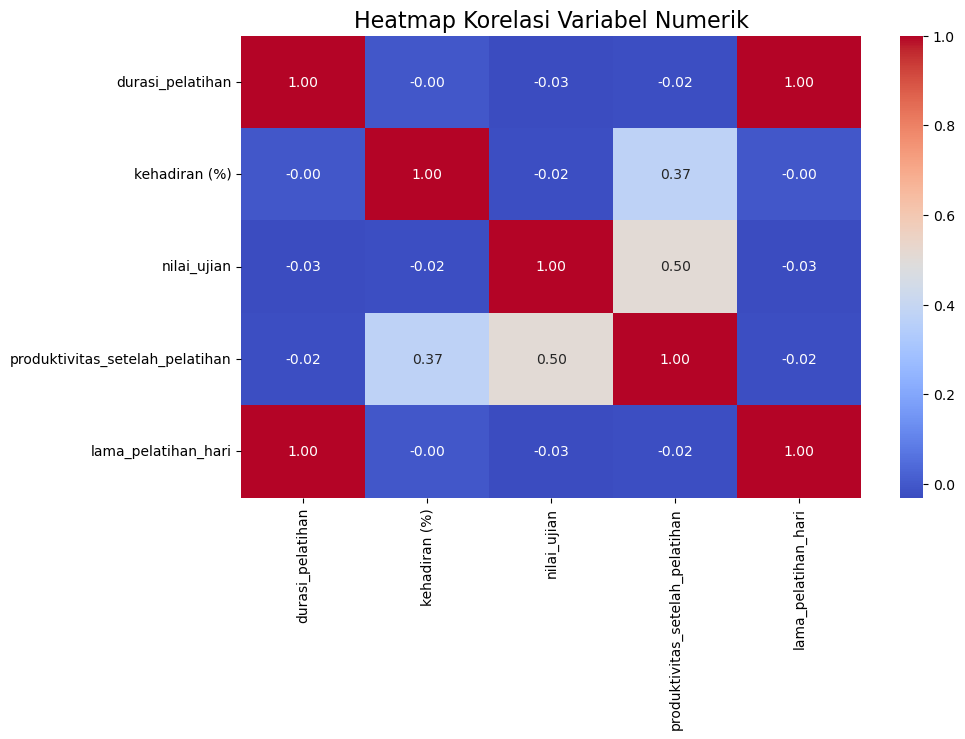

In [12]:
# Analisis Korelasi

# Korelasi antar semua variabel numerik
print("Matriks Korelasi")
kolom_numerik = ['durasi_pelatihan', 'kehadiran (%)', 'nilai_ujian', 'produktivitas_setelah_pelatihan', 'lama_pelatihan_hari']
matriks_korelasi = df[kolom_numerik].corr()

print(matriks_korelasi)

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10,6))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik', fontsize=16)
plt.show()

### Data Modeling & Analysis

In [13]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
# Fitur (X) dan Target (y)
features = ['nilai_ujian', 'kehadiran (%)', 'durasi_pelatihan']
target = 'produktivitas_setelah_pelatihan'

X = df[features]
y = df[target]

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"--- Evaluasi Model Regresi Linear ---")
print(f"R-squared: {r2:.4f}")

# Cek Koefisien (Seberapa penting setiap fitur)
coef = pd.Series(model.coef_, index=X_train.columns)
print("Faktor Penting dalam Prediksi Produktivitas")
print(coef.sort_values(ascending=False))

--- Evaluasi Model Regresi Linear ---
R-squared: 0.3693
Faktor Penting dalam Prediksi Produktivitas
kehadiran (%)       0.656074
nilai_ujian         0.414717
durasi_pelatihan   -0.005630
dtype: float64


### Export Data Bersih untuk Tableau

In [15]:
# Import Libraries
import os

In [16]:
os.makedirs('../data/processed', exist_ok=True)

output_path = '../data/processed/bbpvp_pelatiihan_cleaned.csv'
df.to_csv(output_path, index=False, sep=';', encoding='utf-8')

print(f"Data bersih telah disimpan di {output_path}")

Data bersih telah disimpan di ../data/processed/bbpvp_pelatiihan_cleaned.csv
